In [27]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.functions import year
from pyspark.ml.feature import StringIndexer
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns


In [28]:

# Spark Load Dataset
df = spark.read.csv('Datasets/worldriskindex.csv', inferSchema=True, header=True)

df2 = spark.read.csv('Datasets/prevalence.csv', inferSchema=True, header=True)

df3 = spark.read.csv('Datasets/poverty-share-on-less-than-30-per-day.csv', inferSchema=True, header=True)

df4 = spark.read.csv('Datasets/yielddf.csv', inferSchema=True, header=True)

In [ ]:
# pandas 
file1 = 'Datasets/worldriskindex.csv'

file2 = 'Datasets/prevalence.csv'

file3 = 'Datasets/poverty-share-on-less-than-30-per-day.csv'

file4 = 'Datasets/yielddf.csv'

df = pd.read_csv(file1)

df2 = pd.read_csv(file2)

df3 = pd.read_csv(file3)

df4 = pd.read_csv(file4)

In [ ]:
df.show()

In [ ]:
df2.show()

In [ ]:
df3.show()

In [ ]:
df4.show()

In [ ]:
# Explore Data

df.describe().show()

In [ ]:
df2.describe().show()

In [ ]:
df3.describe().show()

In [ ]:
df4.describe().show()

In [ ]:
sns.displot(df['WRI'])


In [ ]:
sns.displot(df2['Prevalence of undernourishment (% of population)'])


In [ ]:
sns.displot(df3['$30.00 per day - share of population below poverty line'])


In [ ]:
sns.displot(df4['hg/ha_yield'])

In [29]:
df_filtered = df[df['Year'] == 2013]
df_filtered2 = df2[df2['Year'] == 2013]
df_filtered3 = df3[df3['Year'] == 2013]
df_filtered4 = df4[df4['Year'] == 2013]

In [ ]:
df_filtered.show()

In [ ]:
df_filtered2.show()

In [ ]:
df_filtered3.show()

In [ ]:
df_filtered4.show()

In [ ]:
def classify_poverty_level(value):
    if value > 90:
        return 'extreme poor'
    elif 70 <= value <= 90:
        return 'very poor'
    elif 50 <= value < 70:
        return 'poor'
    else:
        return 'not poor'

In [ ]:
df3['Poverty Level'] = df3['$30.00 per day - share of population below poverty line'].apply(classify_poverty_level)

In [ ]:
df3

In [30]:
df2_renamed = df2.withColumnRenamed("Entity","Region")
df2_renamed.show()

df3_renamed = df3.withColumnRenamed("Entity","Region")
df3_renamed.show()

df4_renamed = df4.withColumnRenamed("Area","Region")
df4_renamed.show()

+-----------+----+----+------------------------------------------------+
|     Region|Code|Year|Prevalence of undernourishment (% of population)|
+-----------+----+----+------------------------------------------------+
|Afghanistan| AFG|2001|                               47.79999923706055|
|Afghanistan| AFG|2002|                              45.599998474121094|
|Afghanistan| AFG|2003|                              40.599998474121094|
|Afghanistan| AFG|2004|                                            38.0|
|Afghanistan| AFG|2005|                              36.099998474121094|
|Afghanistan| AFG|2006|                               33.29999923706055|
|Afghanistan| AFG|2007|                              29.799999237060547|
|Afghanistan| AFG|2008|                                            26.5|
|Afghanistan| AFG|2009|                              24.399999618530273|
|Afghanistan| AFG|2010|                              23.700000762939453|
|Afghanistan| AFG|2011|                            

23/10/11 01:45:49 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Area, Item, Year, hg/ha_yield, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp
 Schema: _c0, Area, Item, Year, hg/ha_yield, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp
Expected: _c0 but found: 
CSV file: file:///home/ubuntu/aws-instance-fork/Datasets/yielddf.csv


In [20]:
#spark merge

df2_renamed = df_filtered2.withColumnRenamed("Entity","Region")
df3_renamed = df_filtered3.withColumnRenamed("Entity","Region")
df4_renamed = df_filtered4.withColumnRenamed("Area","Region")



merged_df = df_filtered.join(df2_renamed, on=["Region", "Year"], how="inner")

merged_df = merged_df.join(df3_renamed, on=["Region", "Year"], how="inner")
merged_df = merged_df.join(df4_renamed, on=["Region", "Year"], how="inner")



merged_df.show()

23/10/11 01:43:09 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Area, Item, Year, hg/ha_yield, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp
 Schema: _c0, Area, Item, Year, hg/ha_yield, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp
Expected: _c0 but found: 
CSV file: file:///home/ubuntu/aws-instance-fork/Datasets/yielddf.csv


+-----------+----+-----+--------+-------------+--------------+---------------------------+----------------------------+-----------------+------------+----------------------+-----------------------+----+------------------------------------------------+----+-------------------------------------------------------+-----+--------------------+-----------+-----------------------------+-----------------+--------+
|     Region|Year|  WRI|Exposure|Vulnerability|Susceptibility|Lack of Coping Capabilities| Lack of Adaptive Capacities|Exposure Category|WRI Category|Vulnerability Category|Susceptibility Category|Code|Prevalence of undernourishment (% of population)|Code|$30.00 per day - share of population below poverty line|  _c0|                Item|hg/ha_yield|average_rain_fall_mm_per_year|pesticides_tonnes|avg_temp|
+-----------+----+-----+--------+-------------+--------------+---------------------------+----------------------------+-----------------+------------+----------------------+---------

In [ ]:
#pandas merge 


In [31]:
merged_df = merged_df.withColumnRenamed("$30.00 per day - share of population below poverty line","poverty")
merged_df = merged_df.withColumnRenamed("Prevalence of undernourishment (% of population)","Prevalence")
merged_df = merged_df.withColumnRenamed("average_rain_fall_mm_per_year","aver_rain")
merged_df = merged_df.withColumnRenamed("pesticides_tonnes","Ptonnes")

merged_df = merged_df.drop("Exposure","Vulnerability","Susceptibility","Lack of Coping Capabilities",
                           "Exposure Category","Vulnerability Category","Susceptibility Category"," Lack of Adaptive Capacities","Code"
                          ,"_c0","Item")



merged_df.show()

+------------+----+-----+------------+------------------+-----------------+-----------+---------+-------+--------+
|      Region|Year|  WRI|WRI Category|        Prevalence|          poverty|hg/ha_yield|aver_rain|Ptonnes|avg_temp|
+------------+----+-----+------------+------------------+-----------------+-----------+---------+-------+--------+
|      Angola|2013| 6.48|      Medium|              15.0|          99.6171|       9022|   1010.0|   40.0|   24.55|
|      Angola|2013| 6.48|      Medium|              15.0|          99.6171|      73409|   1010.0|   40.0|   24.55|
|      Angola|2013| 6.48|      Medium|              15.0|          99.6171|       4405|   1010.0|   40.0|   24.55|
|      Angola|2013| 6.48|      Medium|              15.0|          99.6171|       2415|   1010.0|   40.0|   24.55|
|      Angola|2013| 6.48|      Medium|              15.0|          99.6171|      12744|   1010.0|   40.0|   24.55|
|      Angola|2013| 6.48|      Medium|              15.0|          99.6171|     

In [32]:

df_numeric = merged_df.drop("Region", "WRI Category")

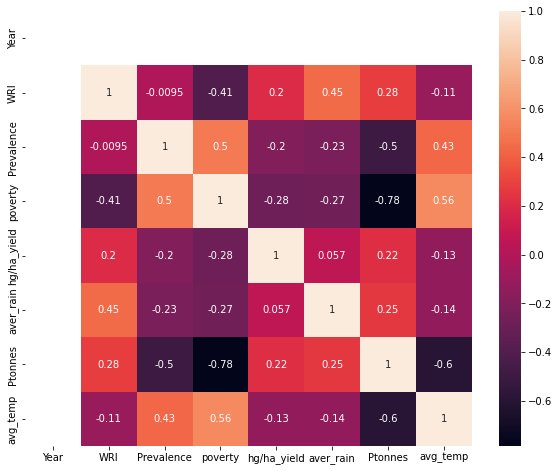

In [33]:

correlation_matrix = []
for i in df_numeric.columns:
    row = []
    for j in df_numeric.columns:
        row.append(df_numeric.stat.corr(i, j))
    correlation_matrix.append(row)


correlation_df = pd.DataFrame(correlation_matrix, columns=df_numeric.columns, index=df_numeric.columns)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True)
plt.show()

In [ ]:
df_numeric_up = merged_df.drop("Year", "aver_rain","avg_temp")


In [ ]:
correlation_matrix = []
for i in df_numeric.columns:
    row = []
    for j in df_numeric_up.columns:
        row.append(df_numeric.stat.corr(i, j))
    correlation_matrix.append(row)


correlation_df = pd.DataFrame(correlation_matrix, columns=df_numeric_up.columns, index=df_numeric_up.columns)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True)
plt.show()